In [0]:
#Haremos el HOLAMUNDO de ML mediante k-means
#El conjunto está incluido sklearn

#Descripción de los datos -> For Iris
"""
-> Agrupados por: Virginica , Versicolor Setosa
-> 50 muestras de cada especie
-> Largo y ancho del sépalo y pétalo (Partes de las flores)
"""


In [0]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd 


In [0]:
import matplotlib.pyplot as plt
iris = datasets.load_iris() #Cargamos nuestro dataset


In [0]:
X_iris = iris.data
Y_iris = iris.target 
#recordemos que es no supervisado KMeans por lo que no entrenaremos mediante Y  sino las similitudes que tenemos 


In [5]:
x = pd.DataFrame(iris.data, columns = ['Sepal length', 'Sepal Width', 'Petal length', 'Petal Width'])
#Jalaremos la información y en específico con la que trabajaremos
y = pd.DataFrame(iris.target, columns= ['Target'])
#Esta informacióón la generaremos

#Mostrando
x.head()

,Sepal length,Sepal Width,Petal length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width')

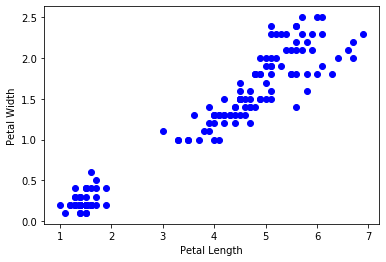

In [6]:
#Ahora vamos a generar los centroides mediante KMeans

#Primero vamos graficar para visualizar información
plt.scatter(x['Petal length'], x['Petal Width'], c='blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

Sin necesidad de un modelo observamos 2 probables grupos, sin embargo, para ello vamos a crear el modelo 

In [0]:
#Vamos a construir el modelo
#k = cantidad de clusters , la cantidad de iteracióón o de movimiento de k 
model = KMeans(n_clusters=2, max_iter=1000)
model.fit(x)

y_labels = model.labels_ #Son nuestras etiquetas basadas en las similitudes

In [8]:
y_kmeans = model.predict(x)
print('Datos predecidos:', y_kmeans)

Datos predecidos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Cada uno de estos 0 y 1 son nuestros grupos encontrados, sin embargo no muestra nada (Lo veremos más adelante), sin embargo, primero veremos que tan fiable fue nuestro modelo

In [9]:
from sklearn import metrics #Recordemos que es un recurso para evaluar o buscar precisión
acurracy = metrics.adjusted_rand_score(Y_iris,y_kmeans) 
#Y_Iris infor de entrada
#Y_kmeans lo que predijo
print(acurracy)

0.5399218294207123


Es un modelo mal entrenado 
- Puede que los datos estén mal 
- Aplicamos mal el modelo
-> Cambiaremos el num de k 


In [10]:
#Cambiemos el valor de la k 
#EJERCICIO: Obtener por prueba y error el modelo máás preciso
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(x)

y_labels = model.labels_ 
y_kmeans = model.predict(x)
print('Datos predecidos:', y_kmeans)
acurracy = metrics.adjusted_rand_score(Y_iris,y_kmeans) 
print('Valor para ver precisión: ', acurracy)

Datos predecidos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Valor para ver precisión:  0.7302382722834697


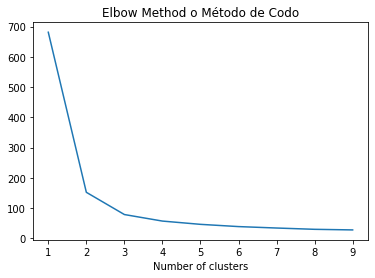

In [19]:
#Como Ingeniero de Datos -> Usar Método de codos

from sklearn.cluster import KMeans

arregloAux = [] #Arreglo auxiliar para guardar cada caso de clusters

for i in range(1, 10):#Para iterar cada uno de los casos
    modelo = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    modelo.fit(x)
    arregloAux.append(modelo.inertia_)#Evaluación de los puntos

#Impresión de datos
#Primero rango o intervalo de x y posteriormente el arregloAuxiliar en Y
plt.plot(range(1, 10), arregloAux)
plt.title('Elbow Method o Método de Codo') #Es un método heurístico
plt.xlabel('Number of clusters')
plt.show()

Text(0, 0.5, 'Petal Width')

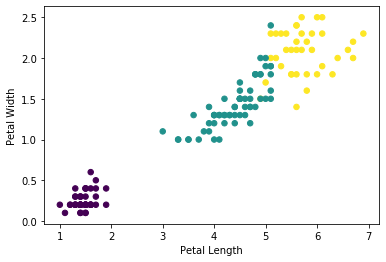

In [13]:
plt.scatter(x['Petal length'],x['Petal Width'], c= y_kmeans, s=30) #S es para el tamaño

plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)

Hay puntos que obviamente no están del todo cercanos y eso se debe al error que tiene el modelo
-Recordemos que está aprendiendo el modelo 
- Si forzamos o escogemos esos puntos a bajo nivel podríamos tener o un sesgo o un sobreajuste -> Literalmente no estaría aprendiendo sino memorizando



Datos predecidos: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Valor para ver precisión:  0.5399218294207123


Text(0, 0.5, 'Petal Width')

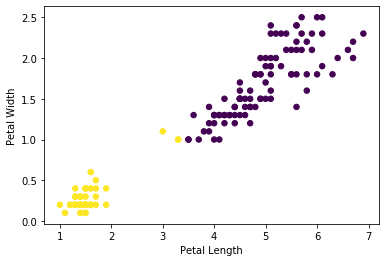

In [15]:
#Mostrar si tenemos sólo dos kmeans

model = KMeans(n_clusters=2, max_iter=1000)
model.fit(x)

y_labels = model.labels_ 
y_kmeans = model.predict(x)
print('Datos predecidos:', y_kmeans)
acurracy = metrics.adjusted_rand_score(Y_iris,y_kmeans) 
print('Valor para ver precisión: ', acurracy)

plt.scatter(x['Petal length'],x['Petal Width'], c= y_kmeans, s=30) #S es para el tamaño

plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)

Sugerencia: Checar visualmente si nuestro modelo parece aceptable 

In [0]:
#Ejercicio de clase -> Este modelo se usa para localizar grupos ;)
#DB de vinos que está en sklearn :D

from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

wine = datasets.load_wine() # Cargamos wine o vino


In [25]:
X_wine = wine.data
Y_wine = wine.target

#Asiganamos a un dataFrame y visualizamos
x = pd.DataFrame(wine.data, columns =wine.feature_names)
y = pd.DataFrame(wine.target, columns = ['Target'])
x.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Mencionar que obvio no sé de vinos pero podemos hacer que 2 cosas 
1) Iterar cada una de las columnas hasta encontrar un patron aceptable
2) Utilizar alguna medida de disperción para observar cual columna es más conveniente -> Covarianza , desviacióón estandar

Text(0, 0.5, 'proline')

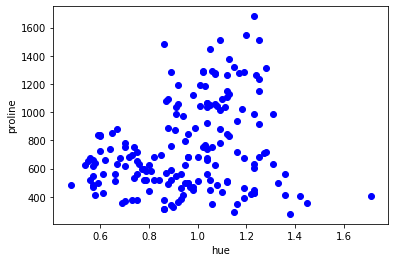

In [27]:
#Escogemos características
feature2 = 'proline'
feature1 = 'hue'

#Visualizamos
plt.scatter(x[feature1], x[feature2], c = 'blue')
plt.xlabel(feature1, fontsize = 10)
plt.ylabel(feature2, fontsize = 10)


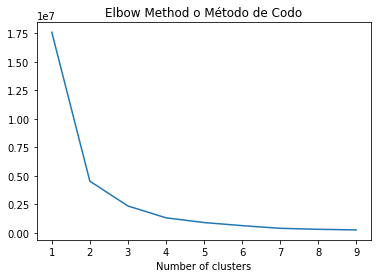

In [35]:
from sklearn.cluster import KMeans

arregloAux = [] #Arreglo auxiliar para guardar cada caso de clusters

for i in range(1, 10):#Para iterar cada uno de los casos
    modelo = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    modelo.fit(x)
    arregloAux.append(modelo.inertia_)#Evaluación de los puntos

#Impresión de datos
plt.plot(range(1, 10), arregloAux)
plt.title('Elbow Method o Método de Codo') #Es un método heurístico
plt.xlabel('Number of clusters')
plt.show()

In [34]:
#  Construcción y evaluación del modelo con K-Means
#  Aprendizaje no supervisado

model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(x)
y_labels = model.labels_

y_kmeans = model.predict(x)
print('Predicciones', y_kmeans)

Predicciones [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [33]:
#Conocer que tan preciso es 
from sklearn import metrics
accuracy = metrics.adjusted_rand_score(Y_wine, y_kmeans)
print(accuracy)


0.29090227688418224


Text(0, 0.5, 'proline')

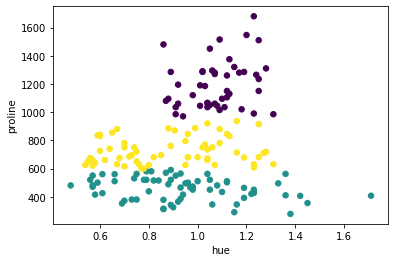

In [31]:
#  Graficacion del modelo 
plt.scatter(x[feature1], x[feature2], c = y_kmeans, s= 30)
plt.xlabel(feature1, fontsize = 10)
plt.ylabel(feature2, fontsize = 10)
